<a href="https://colab.research.google.com/github/KOWSALYAAARU/test_app/blob/main/time_series_forecasting_casestudy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
from numpy import log
from pandas import Series

In [12]:
##1st stage i.e EDA

In [9]:
dataset = pd.read_csv('airline_passengers.csv')
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
dataset = pd.read_csv('airline_passengers.csv')
dataset.head(10)

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [11]:
#Check Missing Data
dataset.isnull().sum()

,0
Month,0
Thousands of Passengers,0


In [12]:
# Information of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [13]:
dataset['Month']=pd.to_datetime(dataset['Month'])
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [15]:
# set the datetime column('month' in our case) as the index for our data as it helps us to quickly filter our data and perform various operations
dataset.set_index('Month',inplace=True)
dataset.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [16]:
### 2st stage after EDA

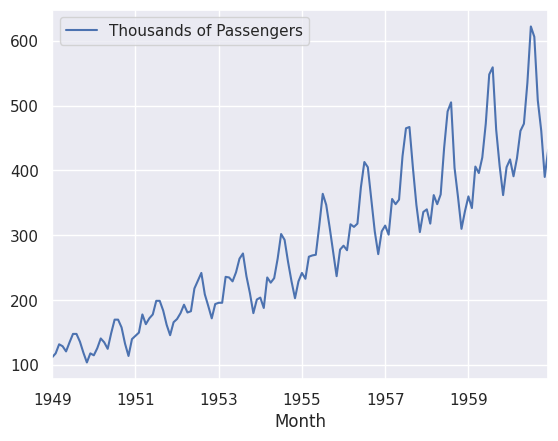

In [17]:
dataset.plot()
plt.show()

In [18]:
dataset.columns

Index(['Thousands of Passengers'], dtype='object')

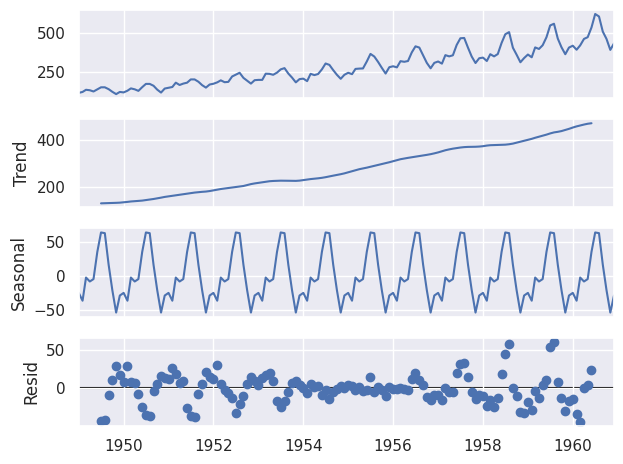

In [19]:
## decompositions of data to check trend,seasonality and irregular time series

from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(dataset)
decompose.plot()
plt.show()

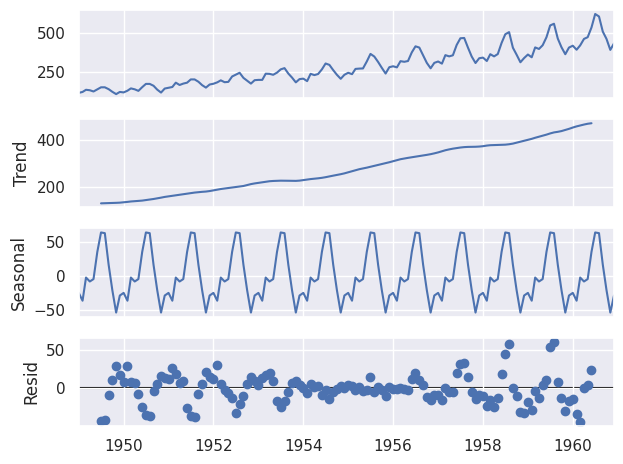

In [20]:
decompose = seasonal_decompose(dataset,model='additive')
decompose.plot()
plt.show()

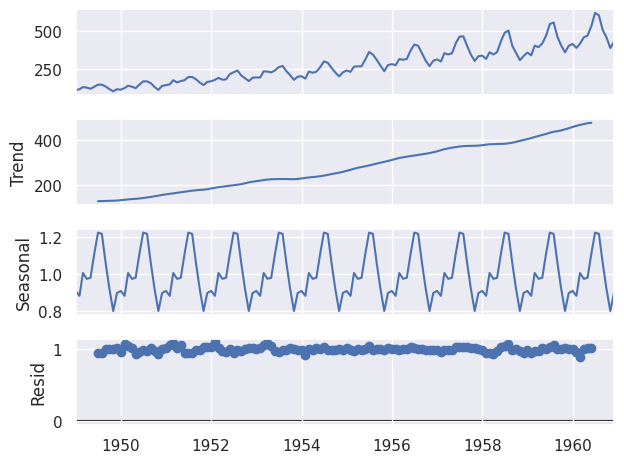

In [21]:
decompose1=seasonal_decompose(dataset,model='multiplicative')
decompose1.plot()
plt.show()

Check autocorrelation part-Durbin Watson Test

In [22]:
import statsmodels.api as sm
sm.stats.durbin_watson(dataset)

array([0.0121528])

Augmented dickey fuller test

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
adfuller(dataset)

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [32]:

def check_adftest(timeseries):
  result = adfuller(timeseries)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number Of Observations Used']
  for i,j in zip(result,labels):
   print(j + "-->" + str(i))

  if result [i] <= 0.05:
     print("Reject Null Hypothesis and my time series is stationary")
  else:
    print("Accept Null Hypothesis and my time series is  non stationary")
